# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.8)


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
import pandas as pd

bos = pd.read_csv('/Users/ruhel/Desktop/Case Study - Boston Housing/boston.csv')
print(bos.shape)
bos.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's rename the target variable of `MEDV` to `PRICE` which will contain the prices. 

In [3]:
bos = bos.rename(columns={"MEDV":"PRICE"})
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [4]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

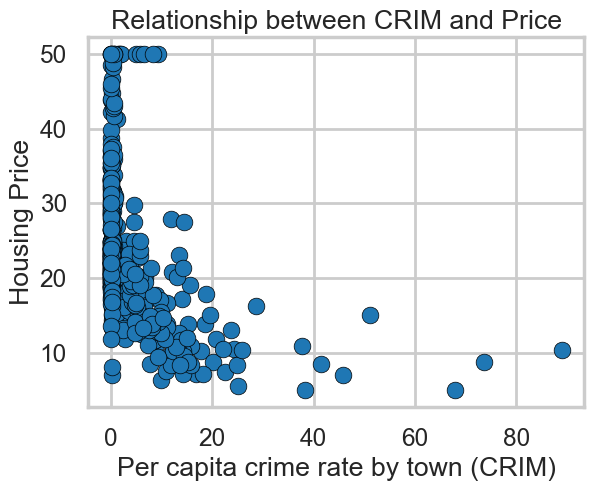

In [57]:
plt.scatter(bos.CRIM, bos.PRICE, edgecolor='black', linewidth=0.5)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [6]:
# Checking the correlation 
bos[['CRIM','PRICE']].corr()

,CRIM,PRICE
CRIM,1.000000,-0.388305
PRICE,-0.388305,1.000000


# your turn: describe relationship

__A correlation coefficient of -0.388 suggests a moderate negative relationship between crime rate and housing price. The relationship may not be strictly linear, as the scatterplot shows signs of non-linearity, especially due to clustering at the low crime rate  and outliers at the high crime rate.__
__Most data points are clustered at low crime rate with a wide variation in price, suggesting that other variables may have influence in house prices, other than crime rate.__

Text(0.5, 1.0, 'Relationship between RM and PRICE')

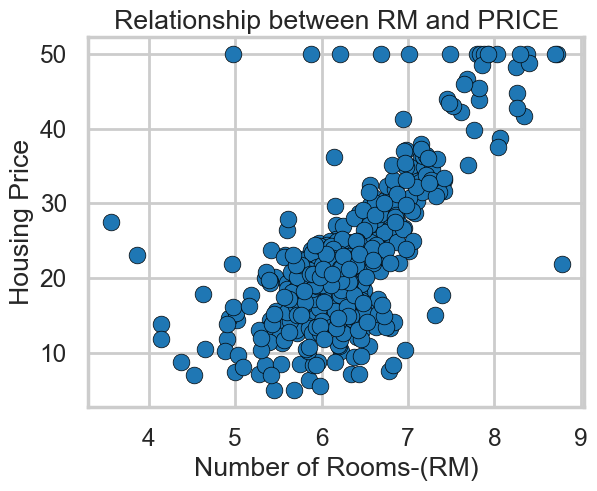

In [7]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE, edgecolor='black', linewidth=0.5)
plt.xlabel('Number of Rooms-(RM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and PRICE')

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

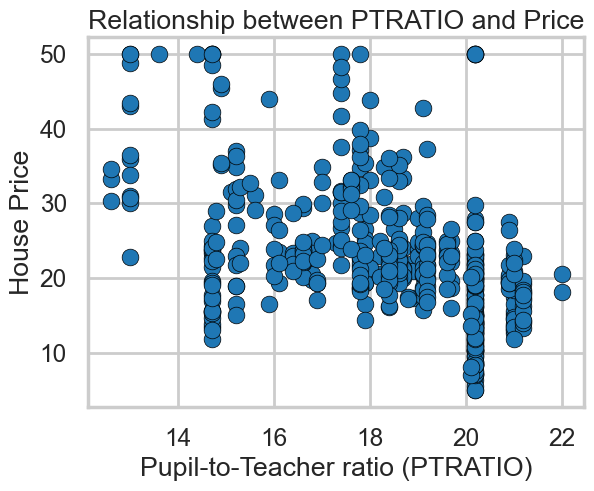

In [33]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE, edgecolor='black', linewidth=0.5)
plt.xlabel('Pupil-to-Teacher ratio (PTRATIO)')
plt.ylabel('House Price')
plt.title('Relationship between PTRATIO and Price')

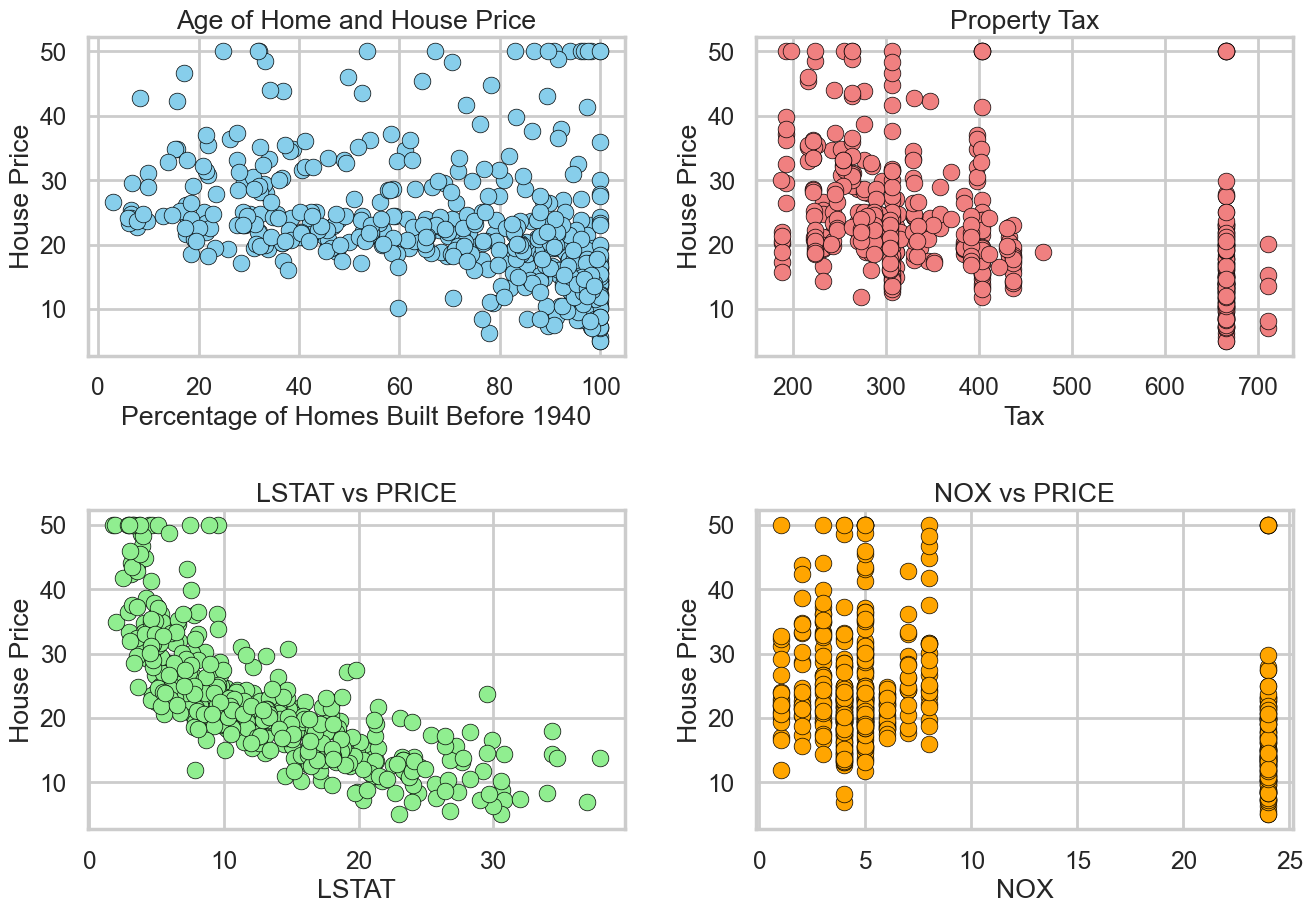

In [61]:
# your turn: create some other scatter plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

# scatter plot AGE vs Price
axes[0,0].scatter(bos.AGE, bos.PRICE, color='skyblue', edgecolor='black', linewidth=0.5)
axes[0,0].set_xlabel('Percentage of Homes Built Before 1940')
axes[0,0].set_ylabel('House Price')
axes[0,0].set_title('Age of Home and House Price')

# Scatterplot of Tax vs Price 
axes[0,1].scatter(bos.TAX, bos.PRICE, color='lightcoral',edgecolor='black', linewidth=0.5)
axes[0,1].set_xlabel('Tax')
axes[0,1].set_ylabel('House Price')
axes[0,1].set_title('Property Tax')

# Scatterplot of LSTAT (Percentage of lower status population ) vs Price 
axes[1,0].scatter(bos.LSTAT, bos.PRICE, color='lightgreen',edgecolor='black', linewidth=0.5)
axes[1,0].set_xlabel('LSTAT')
axes[1,0].set_ylabel('House Price')
axes[1,0].set_title('LSTAT vs PRICE')

# Scatterplot of NOX (Nitric Oxide Concentration) vs Price 
axes[1,1].scatter(bos.RAD, bos.PRICE, color='orange',edgecolor='black', linewidth=0.5)
axes[1,1].set_xlabel('NOX')
axes[1,1].set_ylabel('House Price')
axes[1,1].set_title('NOX vs PRICE')

plt.tight_layout(pad=2)
plt.show()



### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<Axes: xlabel='RM', ylabel='PRICE'>

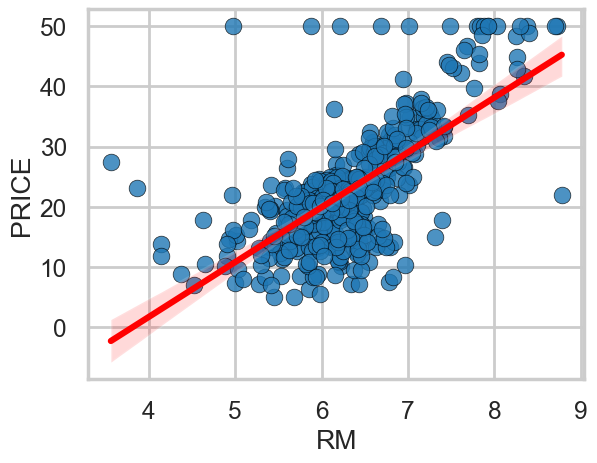

In [58]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True, line_kws={'color':'red'},
           scatter_kws={'edgecolor': 'black', 'linewidth': 0.5})

### Histograms
***


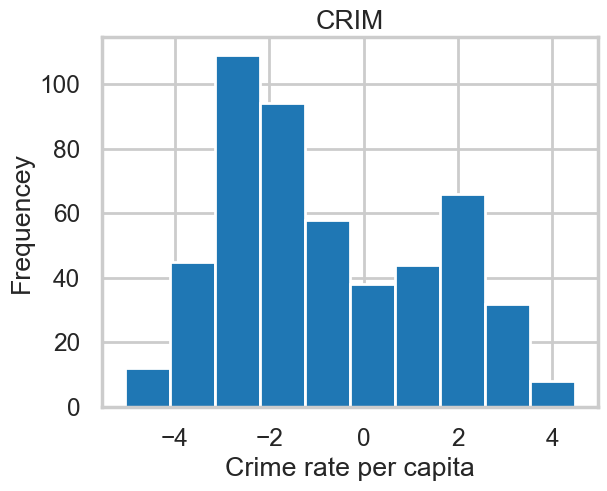

In [11]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

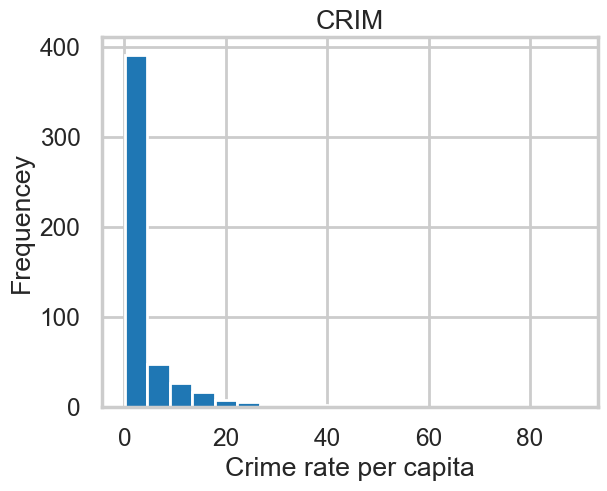

In [12]:
#your turn
plt.hist(bos.CRIM, bins=20)
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.title('CRIM')
plt.show()

__The non log crime rate (CRIM) histogram is heavily right-skewed, with most values clustered near 0, making it hard to see variation among low-crime areas.
Applying a log transformation (log(CRIM)) spreads out the values, reduces skewness, and reveals patterns in low and mid-crime towns that are otherwise hidden. This makes the data more interpretable and suitable for statistical analysis or modeling.__

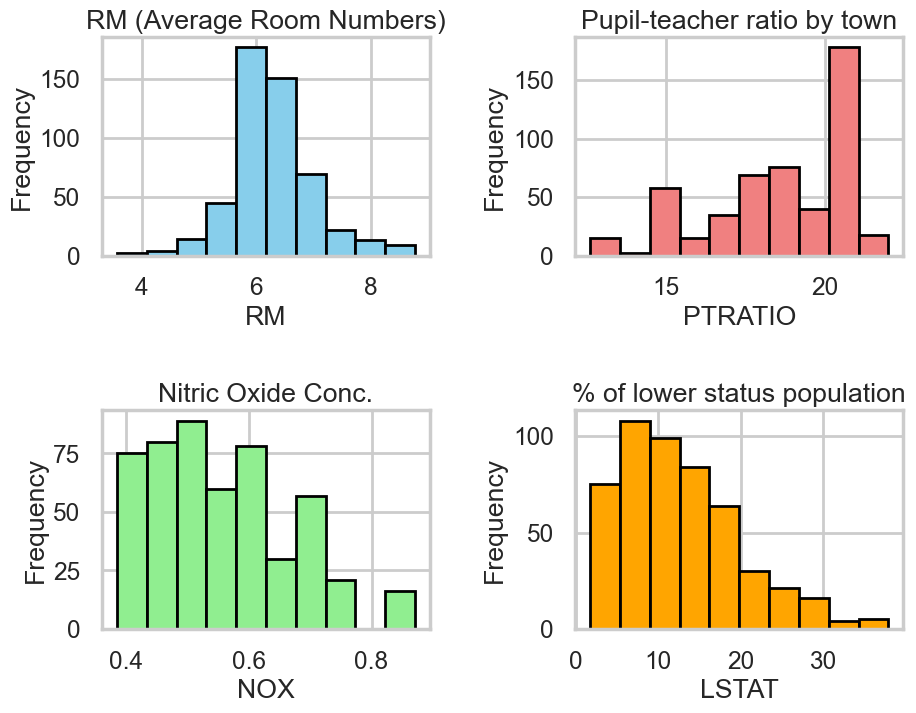

In [62]:
# Histogram of RM. PTRATIO, TAX, and DIS
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

# Histogram of RM (Average Room Numbers) 
axes[0,0].hist(bos.RM, color='skyblue', edgecolor='black')
axes[0,0].set_title('RM (Average Room Numbers)')
axes[0,0].set_xlabel('RM')
axes[0,0].set_ylabel('Frequency')

# Histogram of PTRATIO (Pupil-teacher ratio by town)
axes[0,1].hist(bos.PTRATIO, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Pupil-teacher ratio by town')
axes[0,1].set_xlabel('PTRATIO')
axes[0,1].set_ylabel('Frequency')

# Histogram of NOX (Nitric Oxide Conc.)
axes[1,0].hist(bos.NOX, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Nitric Oxide Conc.')
axes[1,0].set_xlabel('NOX')
axes[1,0].set_ylabel('Frequency')

# Histogram of LSTAT ((Percentage of lower status population )
axes[1,1].hist(bos.LSTAT, color='orange', edgecolor='black')
axes[1,1].set_title('% of lower status population')
axes[1,1].set_xlabel('LSTAT')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout(pad=2)
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [14]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           2.49e-74
Time:                        21:37:44   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

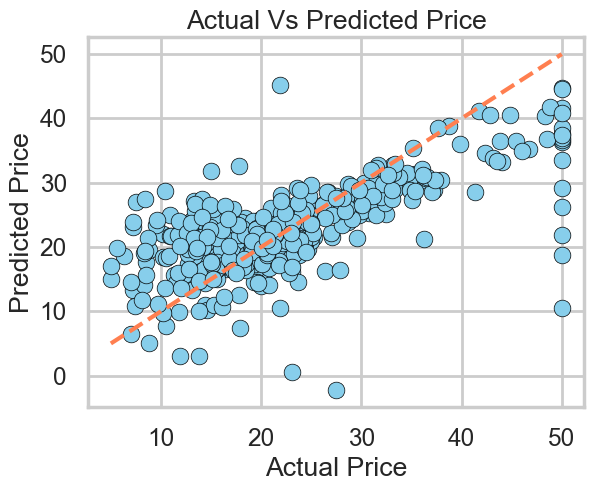

In [16]:
# your turn
# scatter plot of actual price and m.fittedvalues 
plt.scatter(bos.PRICE, m.fittedvalues, color='skyblue', edgecolor='black', linewidth=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price')

# plotting a line of perfect prediction 
plt.plot([bos.PRICE.min(), bos.PRICE.max()],[bos.PRICE.min(), bos.PRICE.max()], color='coral', linestyle='--')
plt.show()

__The scatterplot of Actual Price VS Predicted Price shows a generally linear trend (line of Perfect Prediction), where most predictions align reasonably well with actual prices. However, there is some spread, especially at the higher end of prices, indicating the model may struggle with more expensive houses. A few clear outliers suggest some houses were significantly under-predicted.__

### Fitting Linear Regression using `sklearn`


In [17]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']
# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

In [18]:
lm.fit(X,y)

LinearRegression()

In [19]:
# Predict y 
y_pred = lm.predict(X) 

In [20]:
# coef of determination - R^2 value
lm.score(X,y)

0.7406426641094095

#### What output can you get?

In [21]:
# Look inside lm object
# lm.<tab>
print('Estimated coefficients :',lm.coef_)
print('Estimated Intercept: ',lm.intercept_)

Estimated coefficients : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Estimated Intercept:  36.45948838508978


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [22]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


__A-1: Ways to NOT fit an intercept in a model: 1-In scikit-learn, we can set fit_intercept=False (lm = LinearRegression(fit_intercept=False)). 2-In statsmodels (formula API), we remove the intercept by excluding the constant from the formula (m = ols('PRICE ~ -1 + RM',bos).fit().__

__A-2: We should keep the intercept because in practice data rarely passes through the origin (0,0), forcing the data to pass through the origin by removing the intercept will bias the coefficient estimates.__

__A-3: No, normally ditributed residuals are not enough satify i.i.d assumptions. Because normal distribution doesn't guarantee whether they are independent or have equal variance (homoscedasticity).__

__A-4: False.Linear regression does not require the dependent variable Y to be normally distributed. But the rsiduals should be approximately noramlly ditributed for the inderences (standard error, confidence interval, hypothesis test) made from the model to be accurate.__


In [23]:
# your turn


### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [24]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508978


In [25]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [26]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [27]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

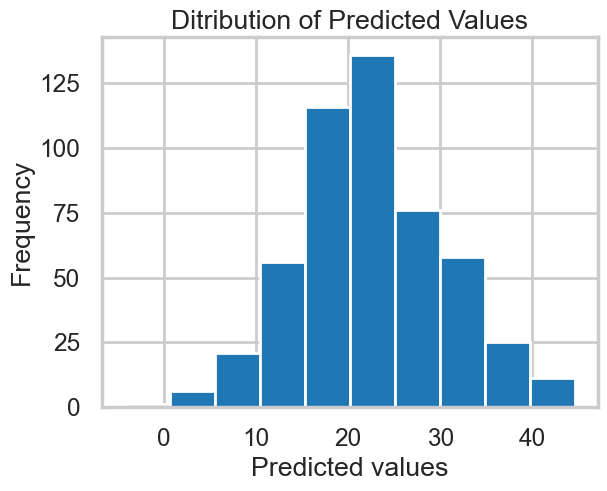

In [28]:
# your turn
plt.hist(lm.predict(X))
plt.xlabel('Predicted values')
plt.ylabel('Frequency')
plt.title('Ditribution of Predicted Values')
plt.show()

__A : The predicted housing prices form a mostly bell-shaped curve with a slight right skew. Most predictions fall between 15,000 and 30,000, with the center around 23,000. A few higher predictions above 40,000 likely represent expensive homes in wealthy areas. We don’t have to remove these points, but if we want more realistic forecasts, we could cap them to match the dataset’s price limits.__

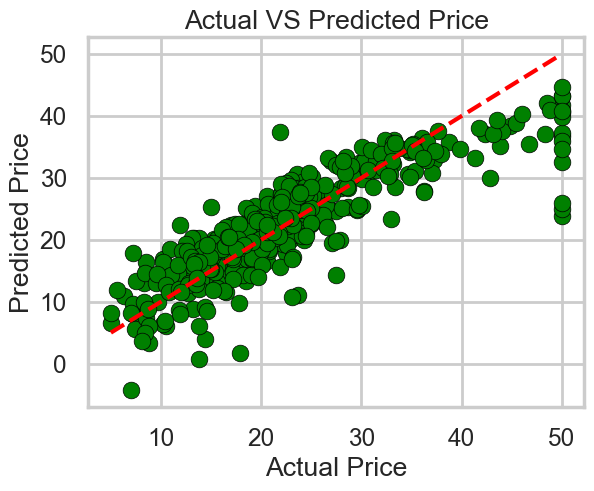

In [37]:
# scatterplot Actual vs Predicted price 
plt.scatter(bos.PRICE, lm.predict(X), color='green', edgecolor='black', linewidth=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title ('Actual VS Predicted Price')

# plotting a line of perfect prediction 
plt.plot([bos.PRICE.min(), bos.PRICE.max()],[bos.PRICE.min(), bos.PRICE.max()], color='red', linestyle='--')
plt.show()

__A: When fitting the Boston housing data with both statsmodels and scikit-learn, the two models gave very similar predictions, but each tool has its own strengths. statsmodels is better for statistical analysis because it provides detailed information such as p-values, confidence intervals, and tests for overall model fit, helping us understand which features are significant. It also allows a clear formula-based way to build models. However, it is less suited for building full machine learning workflows. scikit-learn is designed for prediction, with a simple and consistent API, and it works well with preprocessing, cross-validation, and deployment, though it only gives basic outputs like coefficients and R². The main advantage of statsmodels in this case is that it gives a deeper statistical view of the Boston housing model, not just predictions.__

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [38]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [40]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064252


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [43]:
# your turn
# linear regression model using only the 'PTRATIO' 
# predictor
X = bos[['PTRATIO']]

# target 
y = bos['PRICE']

# Linear Regression model
lm1 = LinearRegression()

# Fit tthe model
lm1.fit(X,y)

# Predict y
y_pred = lm1.predict(X)

# coef of determination - R^2 value
print('R^2 :',lm1.score(X,y))

# Intercept coefficient
print('Estimated intercept coefficient: {}'.format(lm1.intercept_))

# Estimated coefficients
print('Estimated coefficients :',lm.coef_)

R^2 : 0.257847318009223
Estimated intercept coefficient: 62.34462747483265
Estimated coefficients : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


__The R² value of 0.2578 means that about 25.78% of the variation in housing prices (PRICE) is explained by the pupil-teacher ratio (PTRATIO) alone.The model leaves about 74.22% of the variation unexplained, suggesting other variables also play big roles in determining house prices.__

In [51]:
# calculating RSS - Residual Sum of Squares
RSS = np.sum((bos.PRICE - y_pred) ** 2)
print('RSS:',RSS)

# Calculating  𝐸𝑆𝑆 - Explained Sum of Squares
ESS = np.sum((y_pred - np.mean(bos.PRICE)) ** 2)
print('ESS:',ESS)

# number of observation n
n=len(bos.PRICE)

# Number of predictors k, for simple linear regression k =1
k=1

# Calculate the Mean Squares- MSR = ESS/k
MSR = ESS/k
print('MSR:', MSR)

# Calculate Mean Square Error, MSE = RSS/(n-k-1)
MSE = RSS/(n-k-1)
print('MSE:',MSE)

# Calculate F statistics, F= MSR/MSE
F = MSR/MSE
print('F-statistics:',F)

RSS: 31702.013206967255
ESS: 11014.282208052498
MSR: 11014.282208052498
MSE: 62.90081985509376
F-statistics: 175.10554287569516


__Calculated F-statistic ≈ 175.12 is quite large, suggesting that PTRATIO has a meaningful impact on housing prices.__ 

__Since I have used scikitLearn for this model,it doesn’t provide built-in t-statistics or F-statistics. However, in simple linear regression (with only one predictor), there is a known mathematical relationship where the F-statistic equals the square of the t-statistic for that predictor.__

__F = t^2__ 

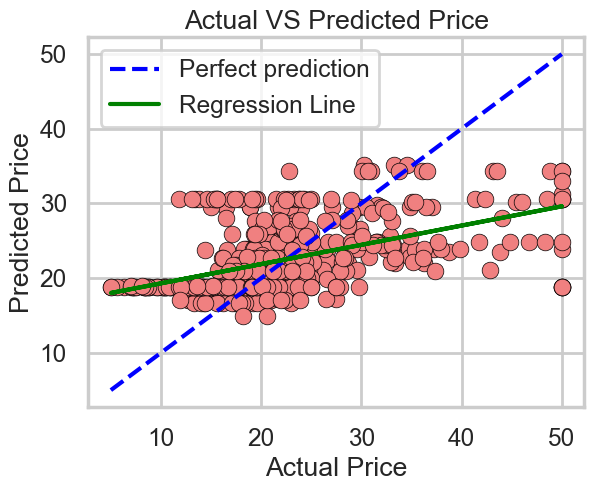

In [50]:
# scatterplot Actual vs Predicted price using feature PTRATIO
plt.scatter(bos.PRICE, y_pred, color='lightcoral', edgecolor='black', linewidth=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title ('Actual VS Predicted Price')

# plotting a line of perfect prediction 
plt.plot([bos.PRICE.min(), bos.PRICE.max()],[bos.PRICE.min(), bos.PRICE.max()], color='blue', linestyle='--', label='Perfect prediction')


# Fit regression line between actual and predicted
slope, intercept = np.polyfit(bos.PRICE, y_pred, 1)
reg_line = slope * bos.PRICE + intercept

plt.plot(bos.PRICE, reg_line, color='green',label='Regression Line')

plt.legend()
plt.show()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [53]:
# your turn
# Fit a linear regression model using three independent variables(CRIM,RM,PTRATIO) using statsmodel OLS
model = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
predicted_price = model.predict(bos)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           6.15e-98
Time:                        00:29:27   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

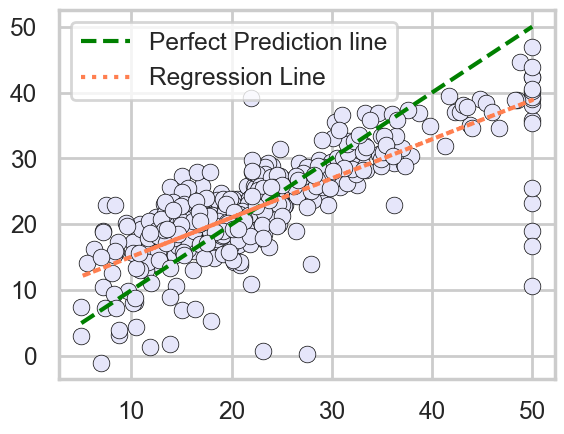

In [56]:
# Scatterplot of predicted price vs actual
plt.scatter(bos.PRICE, predicted_price, color='lavender', edgecolor='black', linewidth=0.5)

# perfect prediction line

plt.plot([bos.PRICE.min(), bos.PRICE.max()],[bos.PRICE.min(), bos.PRICE.max()], color='green', 
         linestyle='--', label='Perfect Prediction line')

# Fit regression line between actual and predicted
slope, intercept = np.polyfit(bos.PRICE, predicted_price, 1)
reg_line = slope * bos.PRICE + intercept

plt.plot(bos.PRICE, reg_line, color='coral',label='Regression Line', linestyle=':')

plt.legend()
plt.show()

__The quite large F-statistic (245.2) with a very small p-value (Prob (F-statistic : 6.15e-98)
tells us that overall regression model is highly significant. The set of predictors (CRIM, RM, and PTRATIO) together explain a significant amount of variation in housing prices.__

__The R-squared value is 0.594, meaning approximately 59.4% of the variance in housing prices is explained by the three predictors (CRIM, RM, and PTRATIO) combined. It still leaves 41.6% variance unexplained, probably due to other factors.__

__CRIM (crime rate): Coefficient is 0.2050 with a very low p-value (0.000), so it is statistically significant. For each unit increase in crime rate, the median house price decreases by about 205 dollar.This aligns with the idea that higher crime impacts housing prices.__

__RM (average number of rooms): Coefficient is 7.3804 with a very low p_value (p = 0.000)is very highly statistically significant. Each additional average room increases the median price by about 7,380 dollar. More rooms generally increase house value.__

__PTRATIO (pupil-teacher ratio): Coefficient is 1.0695, significant with low P-value(p=0.000). A higher pupil-teacher ratio is associated with a decrease of about 1,070 in house price for each unit increase. This indicates that better school conditions (lower PTRATIO) relate to higher home prices.__

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [64]:
# # Fit a linear regression model using  variables (CRIM,RM,PTRATIO,NOX, and LSTAT) 
# NOX - Nitric Oxide Concentration in the air
# LSTAT - Percentage of lower status population 
# Using statsmodel OLS

model_f = ols('PRICE ~ CRIM + RM + PTRATIO + NOX + LSTAT',bos).fit()
model_f_pred_price = model_f.predict(bos)
model_f.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     214.1
Date:                Sun, 10 Aug 2025   Prob (F-statistic):          8.91e-122
Time:                        11:58:54   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.4689      4.116      4.244      0.000       9.382      25.556
CRIM          -0.0620      0.032     -1.965      0.050      -0.124    4.65e-06
RM             4.6332      0.428     10.815      0.000       3.792       5.475
PTRATIO       -0.8935      0.119     -7.500      0.000      -1.128      -0.659
NOX           -1.3190      2.553     -0.517      0.606      -6.334       3.696
LSTAT         -0.5222      0.051    -10.181      0.000      -0.623      -0.421
==============================================================================
Omnibus:                      224.249   Durbin-Watson:                   0.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1281.912
Skew:                           1.873   Prob(JB):                    4.33e-279
Kurtosis:                       9.839   Cond. No.                         439.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Calcualte the  𝐹 -test  comparing the two models 
# RSS (Residual Sum of Squares) of model (3 variables) and model_f (5 variables) using model.resid

RSS_3 = np.sum(model.resid**2)
RSS_5 = np.sum(model_f.resid**2)

# Degree of freedom of the residuals using df_resid
df_3 = model.df_resid
df_5 = model_f.df_resid

# F-stat 
numerator = (RSS_3 - RSS_5) / (df_3 - df_5)
denominator =RSS_5 / df_5
F_stat = numerator/denominator

print('F-statistics:',F_stat)


F-statistics: 68.57580902736827


In [66]:
# Calculate p-value from F-distribution

from scipy.stats import f
p_value = 1 - f.cdf(F_stat, df_3 - df_5, df_5)
print('p-value:', p_value)

p-value: 1.1102230246251565e-16


In [67]:
# Compare the  AIC
print(f"AIC 3-variable model: {model.aic}")
print(f"AIC 5-variable model: {model_f.aic}")

AIC 3-variable model: 3231.9451235449956
AIC 5-variable model: 3113.290952382385


__The  large F-statistic (68.57) paired with a very small p-value (1.1102230246251565e-16) means the model_f with  5 variables  fits the data significantly better than the model with 3 variables.__

__The model_f with 5 variables has a lower AIC (3113 vs. 3232), indicating it’s the better model despite having more parameters.__



## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

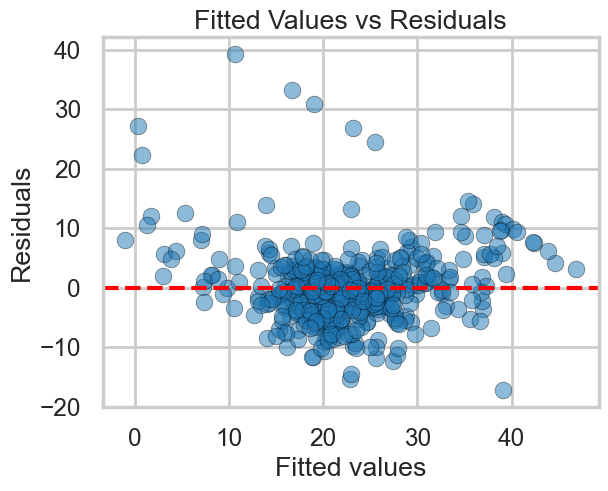

In [68]:
# Fitted value vs residual plot of the reduced model

fitted_vals = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_vals, residuals, edgecolor='k',linewidth=0.5, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals')
plt.show()


__Ideally, the residuals should be random scattered around zero without any visible pattern. The reduced models scatter plot shows that the model meets the conditions, indiacating the model is a good fit.__

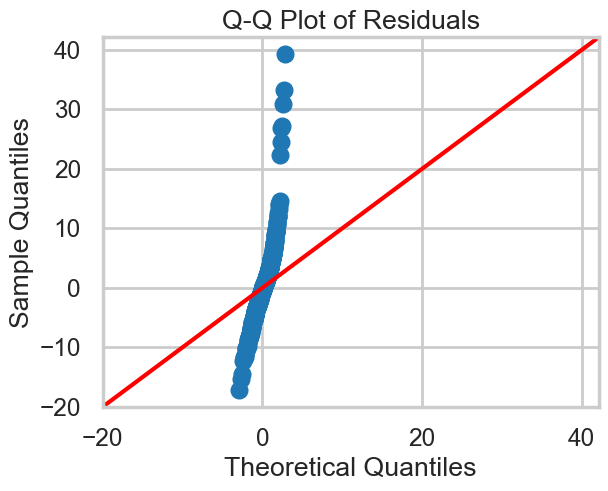

In [81]:
#Construct a quantile plot of the residuals.
# Using sm.qqplot from statsmodel

sm.qqplot(model.resid, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

Text(0.5, 1.0, 'Residuals Ditribution')

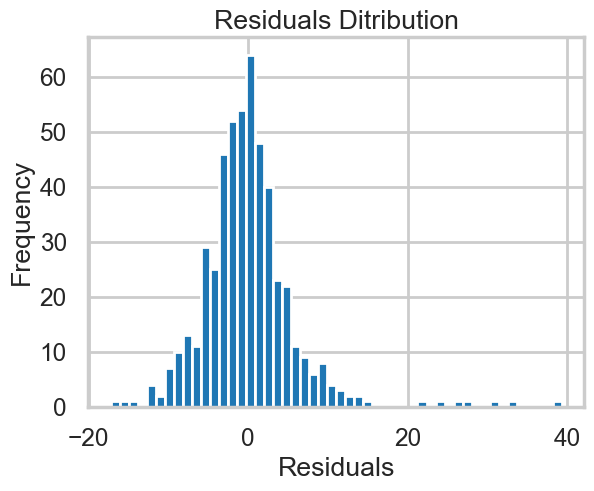

In [79]:
# checking distribution of residuals
plt.hist(model.resid, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Ditribution')

__The Quantile plot of the residuals is distorted most liketly due to the ouliers shown in the histogram, even though the histogram suggests the residulas are normally ditributed. Our QQ plot indicates violation of residual normality assumption, which impacts the validity of hypothesis tests and confidence intervals in our linear regression model.__

__The fitted vs. residual plot helps check for non-linearity and unequal variance by showing if residuals are randomly scattered around zero without any visible patterns, indicating a good model fit. However, it doesn’t assess whether residuals are normally distributed. In contrast, the QQ plot specifically evaluates the normality of residuals by comparing their distribution to a normal distribution; points close to the 45-degree line suggest normality, while deviations indicate problems like skewness or outliers. Fitted vs. residual plots focus on variance and model form, while QQ plots focus on residual distribution.__ 

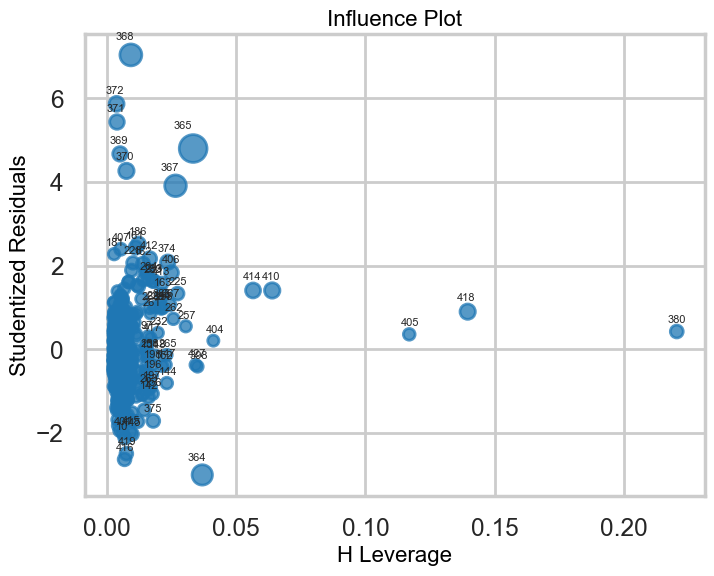

In [84]:
# use statsmodels' built-in influence plot which shows leverage, standardized residuals, and Cook's distance all in one plot 

fig, ax = plt.subplots(figsize=(8,6))
sm.graphics.influence_plot(model, ax=ax,criterion="cooks",size=20)

for txt in ax.texts:
    txt.set_fontsize(8)  # set smaller font size


plt.show()

__This influence plot shows how individual observations in the Boston Housing dataset affect our regression model, which uses CRIM (per capita crime rate), RM (average number of rooms), and PTRATIO (pupil–teacher ratio) to predict PRICE. Leverage, plotted on the x-axis, measures how unusual a data point’s predictor values are — for example, a house with an extremely high CRIM value, unusually large RM, or extreme PTRATIO would appear far to the right. Studentized residuals, on the y-axis, measure how far the actual PRICE is from the predicted value after adjusting for scale; larger absolute values indicate that the home’s price doesn’t match what the model predicts given its predictors. The bubble size reflects Cook’s distance, a combined measure of influence. Most observations have low leverage and moderate residuals, meaning they are typical in both predictors and predicted price. A few homes, such as observation 380, have very high leverage — likely because their CRIM, RM, or PTRATIO values are far from the dataset’s average — but still small residuals, meaning the model fits them well. Others, like observations 368 and 365, have large residuals despite typical predictor values, suggesting their prices are unusual given the crime rate, room count, and pupil–teacher ratio. The most concerning cases would have both extreme predictor values and large price deviations, but in this model, most influential points fall into only one category.__

In [88]:
# Removing the outliers and high leverage points 
# Fit model
X = sm.add_constant(bos[['CRIM', 'RM', 'PTRATIO']])
y = bos['PRICE']
model = sm.OLS(y, X).fit()

# Influence measures
inf = model.get_influence().summary_frame()

# Filter out high leverage OR outliers by applying leverage thereshold - 2(k+1)/n
lev_threshold = 2*(X.shape[1])/len(X)   # 2(k+1)/n
mask = (inf['hat_diag'] > lev_threshold) | (abs(inf['student_resid']) > 3)

# Refit without them
model_clean = sm.OLS(y[~mask], X[~mask]).fit()

print(model.summary())
print(model_clean.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           6.15e-98
Time:                        00:45:14   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3707      4.034     -0.836      0.4

__After removing outliers and high-leverage points, the cleaned model shows a notable improvement in fit, with the R-squared increasing to 0.707 and the adjusted R-squared to 0.705. The intercept became statistically significant at -12.73, while the effect of CRIM on price strengthened negatively (-0.536), RM’s positive influence also increased (8.37), and PTRATIO remained negatively associated but with a slightly reduced magnitude (-0.89). Although residual diagnostics still indicate some departure from normality, the skewness and kurtosis improved (0.476 and 4.435 respectively), and the Durbin-Watson statistic rose to 1.03, suggesting reduced autocorrelation. However, the condition number increased slightly to 370, pointing to continued concerns about multicollinearity in the model.__